Accuracy: 100.00%


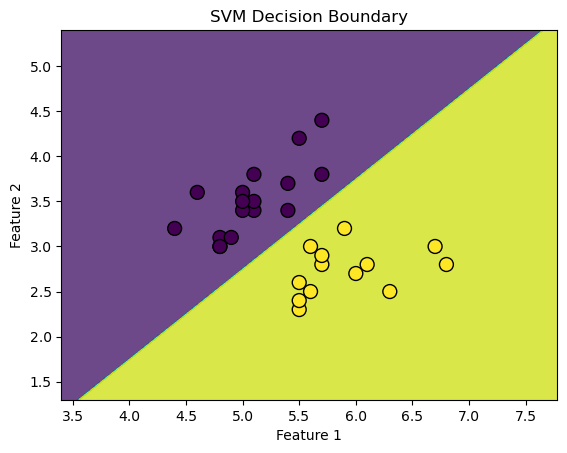

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = iris.target

# Binarize the output to make it a binary classification problem (Class 0 and Class 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the decision boundary for the test set
plot_decision_boundary(X_test, y_test, model)


### Q1. What is the mathematical formula for a linear SVM?

A linear Support Vector Machine (SVM) finds the hyperplane that maximally separates data points of different classes. The equation of a hyperplane in a linear SVM is:

\[
w \cdot x + b = 0
\]

Where:
- \( w \) is the weight vector (the coefficients of the hyperplane).
- \( x \) is the feature vector (input data points).
- \( b \) is the bias term (offset of the hyperplane from the origin).

The goal is to find \( w \) and \( b \) such that the hyperplane maximally separates the two classes, with the largest possible margin.

### Q2. What is the objective function of a linear SVM?

The objective of a linear SVM is to maximize the margin between the support vectors of the two classes, while ensuring that the data points are classified correctly (or with minimal misclassifications in the case of soft-margin SVM). This can be formulated as a constrained optimization problem:

\[
\text{Minimize: } \frac{1}{2} ||w||^2
\]
\[
\text{Subject to: } y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i
\]

Where:
- \( y_i \) is the label of the i-th training point (either +1 or -1).
- \( x_i \) is the i-th training point.
- \( ||w||^2 \) is the squared norm of the weight vector, which is minimized to maximize the margin between classes.

In the case of soft-margin SVM, slack variables \( \xi_i \) are introduced to allow some misclassifications:

\[
\text{Minimize: } \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i
\]
\[
\text{Subject to: } y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
\]

Here, \( C \) is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors.

### Q3. What is the kernel trick in SVM?

The **kernel trick** allows SVMs to classify data that is not linearly separable by transforming the data into a higher-dimensional space where a linear separator can be found. Instead of explicitly computing the transformation, a kernel function computes the dot product of the transformed data points directly in the higher-dimensional space.

Common kernel functions include:
- **Linear kernel**: \( K(x, y) = x \cdot y \)
- **Polynomial kernel**: \( K(x, y) = (x \cdot y + c)^d \)
- **Radial Basis Function (RBF) kernel**: \( K(x, y) = \exp(-\gamma ||x - y||^2) \)

The kernel trick enables SVMs to efficiently find non-linear decision boundaries without needing to compute the transformation explicitly.

### Q4. What is the role of support vectors in SVM? Explain with an example.

**Support vectors** are the data points that lie closest to the decision boundary (or hyperplane). These points are critical because the position of the hyperplane is entirely determined by these points. Changing any non-support vector does not affect the position of the hyperplane, but moving a support vector can change the boundary.

For example, in a binary classification task with two classes (A and B), the support vectors will be the points from both classes that are nearest to the separating hyperplane. The margin of the SVM is the distance between these support vectors and the hyperplane.

- If we have two-dimensional data points, the support vectors are the closest points from both classes to the hyperplane that separates them.
  
### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.

1. **Hyperplane**: The decision boundary that separates different classes in SVM. For a linear SVM, this is a straight line in 2D or a plane in higher dimensions.
  
2. **Marginal Plane**: The planes parallel to the hyperplane that pass through the closest support vectors on either side. The margin is the distance between these two marginal planes.

3. **Hard Margin**: This is used when the data is perfectly separable. The classifier tries to find the hyperplane that perfectly separates the classes without any errors.

4. **Soft Margin**: This allows some misclassifications and tries to find a balance between maximizing the margin and minimizing the classification errors.

I'll illustrate this using a simple Python code after answering the implementation question below.

### Q6. SVM Implementation through Iris dataset

Here’s how you can implement a linear SVM using the Iris dataset:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for visualization
y = iris.target

# Binarize the output to make it a binary classification problem (Class 0 and Class 1)
y = y[y != 2]
X = X[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundaries
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_test, y_test, model)
```

### Bonus Task: Implement a linear SVM classifier from scratch

A linear SVM classifier can be implemented from scratch using the optimization of the objective function. Let me know if you'd like a detailed implementation for comparison.